generate pileup distribution for background samples.

In [1]:
from coffea import hist
from coffea.processor import defaultdict_accumulator
import coffea.processor as processor
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import json
datasets_=json.load(open('../Samples/backgrounds_nonempty.json'))

from collections import defaultdict
datasets = defaultdict(list)
for group in datasets_:
    for tag in datasets_[group]:
        datasets[group].extend( datasets_[group][tag] )

In [11]:
class pileupProcessor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat('dataset', 'dataset')
        pileup_axis = hist.Bin('pu', '#pileup', 100, 0, 100)
        
        self._accumulator = processor.dict_accumulator({
            'pu': hist.Hist('#counts', dataset_axis, pileup_axis),
        })
        
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, df):
        output = self.accumulator.identity()
        dataset = df['dataset']
        
        pileup = df['trueInteractionNum']
        output['pu'].fill(dataset=dataset, pu=pileup)
        
        return output
    
    def postprocess(self, accumulator):
        return accumulator

In [12]:
output = processor.run_uproot_job(datasets,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=pileupProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                  maxchunks=1
                                 )

Processing: 100%|██████████| 14/14 [00:02<00:00,  6.98items/s]


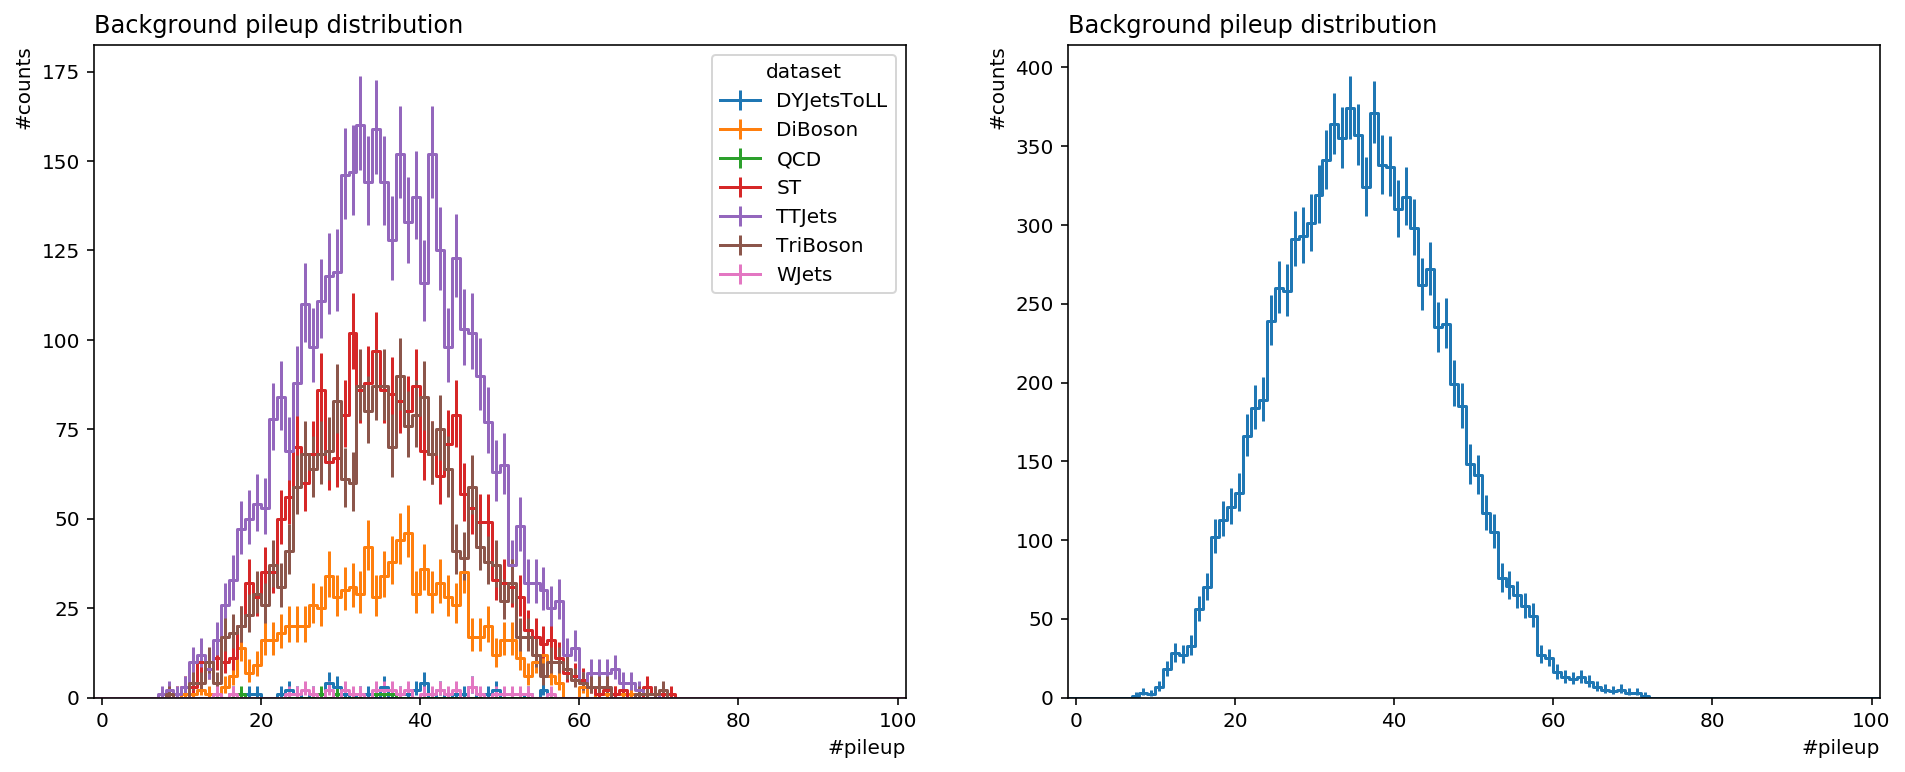

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
hist.plot1d(output['pu'], overlay='dataset', overflow='all', ax=ax[0], )
hist.plot1d(output['pu'].sum('dataset'), overflow='all', ax=ax[1], )
for a in ax:
    a.set_title('Background pileup distribution', x=0.0, ha="left")
    a.set_xlabel(a.get_xlabel(), x=1.0, ha="right")
    a.set_ylabel(a.get_ylabel(), y=1.0, ha="right")

In [10]:
uproot.open(datasets['DYJetsToLL'][0])['ffNtupleStat/pileup'].allnumpy()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        7.000e+00, 1.100e+01, 1.900e+01, 3.400e+01, 7.700e+01, 1.710e+02,
        2.260e+02, 3.820e+02, 5.390e+02, 8.190e+02, 1.062e+03, 1.279e+03,
        1.765e+03, 2.039e+03, 2.529e+03, 2.841e+03, 3.178e+03, 3.490e+03,
        3.897e+03, 4.331e+03, 4.893e+03, 4.966e+03, 5.230e+03, 5.565e+03,
        5.973e+03, 6.011e+03, 6.199e+03, 6.321e+03, 6.504e+03, 6.555e+03,
        6.558e+03, 6.420e+03, 6.332e+03, 6.194e+03, 5.979e+03, 5.717e+03,
        5.371e+03, 5.261e+03, 4.658e+03, 4.485e+03, 4.140e+03, 3.733e+03,
        3.488e+03, 3.034e+03, 2.688e+03, 2.422e+03, 2.037e+03, 1.749e+03,
        1.452e+03, 1.244e+03, 9.690e+02, 8.800e+02, 7.250e+02, 5.790e+02,
        4.200e+02, 3.380e+02, 2.570e+02, 2.240e+02, 1.900e+02, 1.270e+02,
        1.060e+02, 7.600e+01, 5.300e+01, 4.000e+01, 2.700e+01, 1.500e+01,
        1.900e+01, 1.000e+01, 7.000e+00, 5.000e+00, 2.000e+00, 6.000e+00,
        1.000e+00, 2.000e+00, 1.000e+0

In [11]:
h = uproot.open(datasets['DYJetsToLL'][0])['ffNtupleStat/pileup']
# len(h.alledges[:-1])
# 
h

<b'TH1D' b'pileup' 0x7fb7a557b4f8>

In [9]:
from uproot_methods.classes.TH1 import from_numpy
import numpy as np
# from_numpy(h.allnumpy())
h = from_numpy(np.histogram(range(10)))

In [13]:
h.values

array([0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 7.000e+00,
       1.100e+01, 1.900e+01, 3.400e+01, 7.700e+01, 1.710e+02, 2.260e+02,
       3.820e+02, 5.390e+02, 8.190e+02, 1.062e+03, 1.279e+03, 1.765e+03,
       2.039e+03, 2.529e+03, 2.841e+03, 3.178e+03, 3.490e+03, 3.897e+03,
       4.331e+03, 4.893e+03, 4.966e+03, 5.230e+03, 5.565e+03, 5.973e+03,
       6.011e+03, 6.199e+03, 6.321e+03, 6.504e+03, 6.555e+03, 6.558e+03,
       6.420e+03, 6.332e+03, 6.194e+03, 5.979e+03, 5.717e+03, 5.371e+03,
       5.261e+03, 4.658e+03, 4.485e+03, 4.140e+03, 3.733e+03, 3.488e+03,
       3.034e+03, 2.688e+03, 2.422e+03, 2.037e+03, 1.749e+03, 1.452e+03,
       1.244e+03, 9.690e+02, 8.800e+02, 7.250e+02, 5.790e+02, 4.200e+02,
       3.380e+02, 2.570e+02, 2.240e+02, 1.900e+02, 1.270e+02, 1.060e+02,
       7.600e+01, 5.300e+01, 4.000e+01, 2.700e+01, 1.500e+01, 1.900e+01,
       1.000e+01, 7.000e+00, 5.000e+00, 2.000e+00, 6.000e+00, 1.000e+00,
       2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 

In [44]:
def expandarray(uniques, counts):
    res = JaggedArray.fromcounts(counts, np.ones(counts.sum()))
    return res * uniques

In [54]:
## This should be done with concurrent.futures..

# ch = hist.Hist('pileup', hist.Cat('dataset', 'dataset'),
#                hist.Bin('pu', '#pileup', 100, 0, 100))
# for d in ['DYJetsToLL', 'QCD']:
#     for f in datasets[d]:
#         h = uproot.open(f)['ffNtupleStat/pileup']
#         ch.fill(dataset=d,
#                 pu=expandarray(h.alledges[:-1], h.allvalues.astype(int)).flatten())

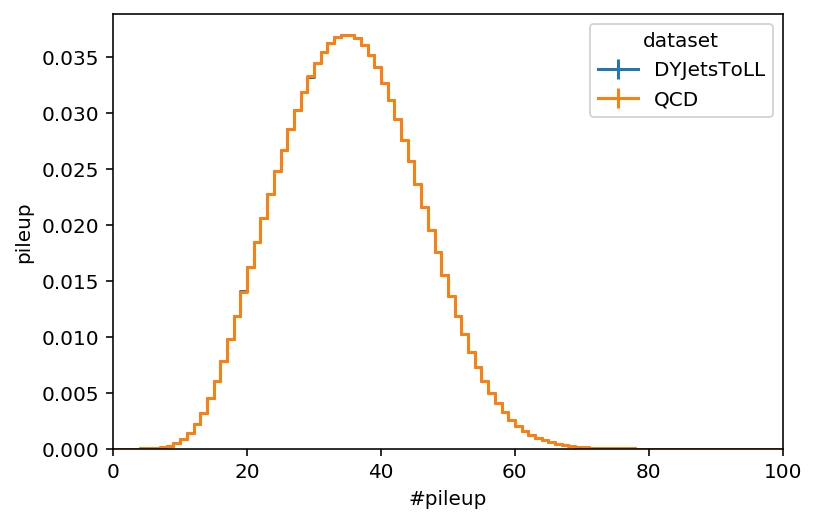

In [59]:
fig,ax = plt.subplots(figsize=(6,4))
hist.plot1d(ch, overlay='dataset', density=True, ax=ax);

In [66]:
outputfile = uproot.create('pileupAutumn18_DYQCD.root')
for d in ['DYJetsToLL', 'QCD']:
    outputfile[d] = hist.export1d(ch.integrate('dataset', d))
outputfile.close()

In [17]:
# from functools import reduce
# from operator import add
# # reduce(add, [1,2,3])
# totalvalues = {}
# for d in ['DYJetsToLL', 'QCD']:
#     totalvalues[d] = reduce(add, [uproot.open(f)['ffNtupleStat/pileup'].values for f in datasets[d]])

In [18]:
# edges = uproot.open(datasets['QCD'][0])['ffNtupleStat/pileup'].edges
# totalhistos = {k: (v, edges) for k, v in totalvalues.items()}

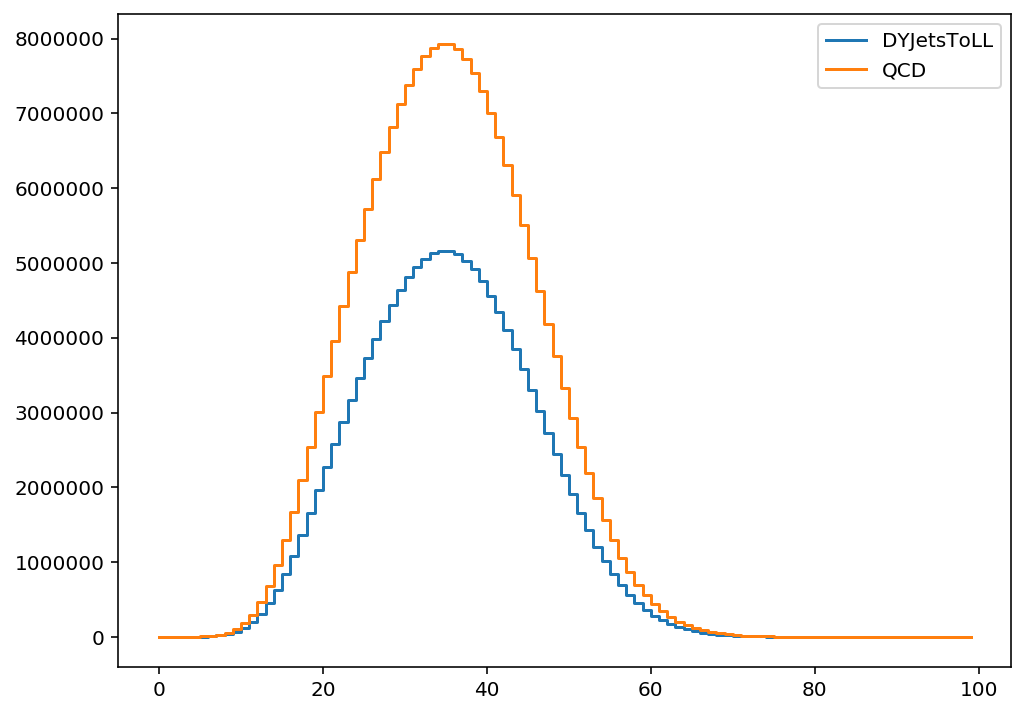

In [27]:
# fig, ax = plt.subplots(figsize=(8,6))
# for k, v in totalhistos.items():
#     ax.step(x=v[1][:-1], y=v[0], where='post', label=k)
# ax.legend();

In [28]:
# outputfile = uproot.create('pileupAutumn18_DYQCD2.root')
# for d in totalhistos:
#     outputfile[d] = from_numpy(totalhistos[d])
# outputfile.close()